In [12]:
%config IPCompleter.greedy=True

In [75]:
!pip install seaborn
!pip install matplotlib
!pip install nbconvert

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.utils import get_db_client

In [2]:
db_client = get_db_client()

In [24]:
df = pd.read_sql(
    sql="""
        select month||'/'||year as month, count(*) 
        from flight_arrival_fact a
        join date_dimension b on (a.sk_date = b.sk_date)
        group by month, year
	""",
	con=db_client.get_conn_engine()
)

In [25]:
df

,month,count
0,1/2007,621559
1,2/2007,565604
2,3/2007,639209
3,4/2007,614648
4,5/2007,631609
5,6/2007,629280
6,7/2007,648560
7,8/2007,653279
8,9/2007,600187
9,10/2007,629992


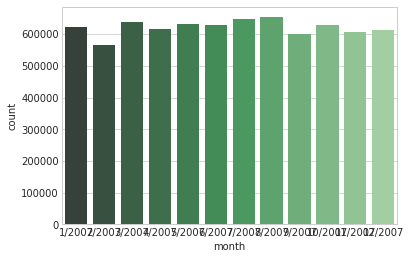

In [28]:
sns.set_style("whitegrid")
sns.barplot(x="month", y="count", palette="Greens_d", data=df)

In [68]:
df = pd.read_sql(
    sql="""
        select b.origin_airport_iata, b.origin_longitude x, b.origin_latitude y, count(*) 
        from flight_arrival_fact a
        join travel_dimension b on (a.sk_travel = b.sk_travel)
        where b.origin_longitude is not null and b.origin_latitude is not null
        group by b.origin_airport_iata, b.origin_longitude, b.origin_latitude
	""",
	con=db_client.get_conn_engine()
)
df.head()

,origin_airport_iata,x,y,count
0,ABE,-75.4404,40.6524,5701
1,ABI,-99.6819,32.4113,2836
2,ABQ,-106.6090,35.0402,41161
3,ABY,-84.1945,31.5355,1312
4,ACK,-70.0602,41.2531,314


In [69]:
!pip install folium


In [70]:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

In [71]:
for index, row in df.iterrows():
    folium.CircleMarker([row['y'], row['x']],
                        radius=15,
                        popup=row['origin_airport_iata'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

m.zoom_start = 6
m